In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.integrate import simps
from matplotlib.patches import Polygon

# Week02 Assignment
1. Fit a linear curve to the data
2. Fit a cubic curve using the SciPy library
3. Find the area underneath the cubic curve over the domain of the data using the tools in SciPy
4. Plot the data, the linear fit, and the cubic fit in Matplotlib. Make sure to give the plot a title and an x and y label. Save this figure and include it in your pull request!
5. Put the area of the curve on the plot somewhere as text using Matplotlib
6. Use the Bayesian information criterion to justify which model (linear or cubic) is preferable. Include this justification in your journal entry for the week.

In [3]:
x = [ 1.,   1.5,  2.,   2.5,  3.,   3.5,  4.,   4.5,  5.,
     5.5,  6.,   6.5,  7.,   7.5, 8.,   8.5,  9.,   9.5, 10. ]
y = [3.43, 4.94, 6.45, 9.22, 6.32, 6.11, 4.63, 8.95, 7.8, 
     8.35, 11.45, 14.71, 11.97, 12.46, 17.42, 17.0, 15.45, 19.15, 20.86]

In [26]:
# Part 1
linear_coeffs = np.polyfit(x, y, 1)
linear_p = np.poly1d(linear_coeffs)

In [27]:
# Part 2
cubic_coeffs = np.polyfit(x, y, 3)
cubic_p = np.poly1d(cubic_coeffs)

In [55]:
# Part 3
t = np.linspace(min(x), max(x), 200)
area = simps(cubic_p(t), t)

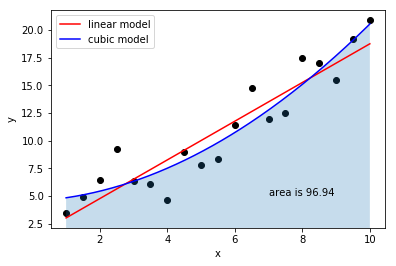

In [60]:
# Part 4 and 5
# Plot the data and the models
fig, ax = plt.subplots()
plt.scatter(x,y, c='k')
plt.plot(t, linear_p(t), 'r', label='linear model')
plt.plot(t, cubic_p(t), 'b', label='cubic model')
plt.xlabel('x')
plt.ylabel('y')

# Plot the integrated area
boundary = [(min(x), 0)] + list(zip(t, cubic_p(t))) + [(max(x), 0)]
poly = Polygon(boundary, alpha=0.25)
ax.add_patch(poly)
plt.text(7, 5, 'area is {0:.2f}'.format(area))

plt.savefig('asedler_01.png')
plt.legend()
plt.show()

In [42]:
# Part 6
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

print('linear BIC: {}'.format(BIC(y,linear_p(x),1)))
print('cubic BIC: {}'.format(BIC(y,cubic_p(x),3)))

linear BIC: 27.03505236755572
cubic BIC: 27.4161371622341
